## **주성분 분석 PCA**
Principle Component Analysis

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv('glass.csv')

df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
# 데이터 스케일 정규화
df1 = df.drop('Type', axis=1)

MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df1)

df_minmax = pd.DataFrame(data=df_minmax, columns=df1.columns)

df_minmax.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.0,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.0,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.0,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.0,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.0,0.0


주성분 분석을 하기에 앞서 데이터 정규화를 적용해주는 이유는 변수들 간의 스케일 차이가 클 경우 분산이 큰 변수가 주성분에 과도하게 영향을 많이 주기 때문이다.

In [ ]:
pca = PCA(n_components = 9)
df_pca = pca.fit_transform(df_minmax)

df_pca = pd.DataFrame(data=df_pca, columns=['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'])

np.round(pca.explained_variance_ratio_, 3)

array([0.454, 0.18 , 0.126, 0.098, 0.069, 0.042, 0.026, 0.004, 0.   ])

주성분의 최대 변수의 개수가 9개이며, 이러한 주성분을 생성하여 각 주성분의 설명력 확인. `explained variance``explained_variance_ratio`

제1주성분은 45.4%, 제2주성분은 18%, 제3주성분은 12.6%의 설명을 가지고 있다는 것을 확인할 수 있다. 9개 주성분의 설명력 총 합은 100%.

In [ ]:
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(df_minmax)

df_pca = pd.DataFrame(data=df_pca, columns=['C1', 'C2'])

df_pca.head()
# 기존의 9개의 변수를 2개의 변수로 차원축소

,C1,C2
0,0.402106,0.032707
1,0.206320,-0.144705
2,0.188617,-0.194854
3,0.237208,-0.097064
4,0.223972,-0.121779


<Axes: xlabel='C1', ylabel='C2'>

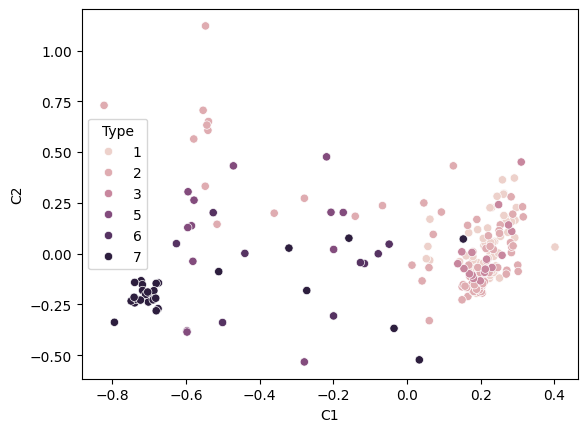

In [ ]:
df_concat = pd.concat([df_pca, df[['Type']]], axis=1)

sns.scatterplot(data=df_concat, x='C1', y='C2', hue='Type')

## **공통요인분석 CFA**
Common Factor Analysis

**Factor Analysis: FA** 요인분석이란, 주어진 데이터의 요인을 분석한다는 개념.
* 요인분석을 하기 위해 전체 분산을 토대로 요인을 추출하는 PCA를 사용하는 경우
* 공통분산만을 토대로 요인을 추출하는 CFA를 선택하는 경우

변수들 간의 공통 변량(공통분산)만을 기반으로 하여 요인을 추출하기 때문에, CFA로 생성한 주성분들은 서로 간에 무엇이 더 중요한 변수라는 **우위 개념이 없다**.

단, 변수 그룹 간의 상관관계가 각각 달라야 요인이 다르게 분리되기 때문에 변수들의 상관관계가 모두 비슷하게 높거나 낮게 나타나면 요인분석에 부적합하다.

#### KMO 검정
변수들 간의 상관관계가 다른 변수에 의해 잘 설명되는 정도를 나타내는 값을 통계적으로 산출하는 검정 방법.
* 독립 변수들 간의 상관계수 제곱들과 편상관계수들을 모두 더한 값에서 상관계수 제곱의 합이 차지하는 비율 값.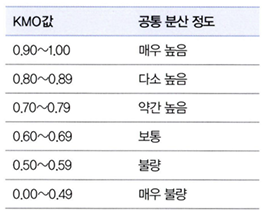

#### 고유치 Eigen Value
**요인이 설명해주는 분산의 양**을 뜻하며, 요인에 해당하는 변수들의 요인 적재 값의 제곱한 값들을 합하여 구할 수 있다.

고유치가 1이라는 것: 해당 요인이 변수 하나만큼의 분산을 가지고 있다는 것을 의미.

In [ ]:
!pip install factor-analyzer
from sklearn.preprocessing import MinMaxScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# CFA 실습
df = pd.read_csv('nba2021_advanced.csv')

df.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,408,15.1,0.599,0.000,0.541,10.5,19.8,15.4,6.8,1.4,3.8,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,PG,24,MIL,6,17,-6.9,0.125,0.250,0.000,0.0,18.2,9.4,13.4,0.0,0.0,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,C,27,NOP,27,760,15.9,0.592,0.006,0.397,16.9,18.0,17.5,10.1,1.7,2.0,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,C,23,MIA,26,873,22.7,0.641,0.015,0.469,6.8,23.2,15.4,27.9,1.4,3.2,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,C,35,SAS,18,480,15.2,0.542,0.298,0.093,3.2,14.0,8.4,11.4,0.7,2.8,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


In [ ]:
# 변수 선택 및 데이터 스케일 정규화

# 요인분석할 column만 선택: 문자형 변수 등 제거
df1 = df.drop(['Player', 'Pos', 'Tm', 'Age'], axis='columns')

# 정규화 스케일링
minmax = MinMaxScaler()
df_minmax = minmax.fit_transform(df1)

df_minmax = pd.DataFrame(data=df_minmax, columns=df1.columns)

df_minmax.head()

,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,0.931034,0.369427,0.703518,0.399333,0.000,0.202850,0.300000,0.365989,0.550000,0.143158,0.186667,0.178404,0.161,0.450382,0.245902,0.318182,0.239437,0.836054,0.688192,0.552147,0.677419,0.146341
1,0.172414,0.013649,0.427136,0.083333,0.250,0.000000,0.000000,0.336414,0.335714,0.282105,0.000000,0.000000,0.000,0.450382,0.180328,0.045455,0.098592,0.587075,0.452030,0.245399,0.402458,0.146341
2,0.896552,0.689718,0.713568,0.394667,0.006,0.148856,0.482857,0.332717,0.625000,0.212632,0.226667,0.093897,0.201,0.274809,0.393443,0.272727,0.352113,0.841497,0.738007,0.503067,0.706605,0.219512
3,0.862069,0.792539,0.798995,0.427333,0.015,0.175853,0.194286,0.428835,0.550000,0.587368,0.186667,0.150235,0.162,0.575064,0.573770,0.636364,0.619718,0.900680,0.793358,0.687117,0.798771,0.536585
4,0.586207,0.434941,0.704774,0.361333,0.298,0.034871,0.091429,0.258780,0.300000,0.240000,0.093333,0.131455,0.064,0.516539,0.229508,0.272727,0.211268,0.818367,0.745387,0.503067,0.712750,0.219512


In [ ]:
# 바틀렛 Bartlett 테스트
chi_square_value, p_value = calculate_bartlett_sphericity(df_minmax)

# 카이스퀘어, p-value 확인
chi_square_value, p_value

(20174.082695114794, 0.0)

**바틀렛 테스트**: 각 변수들 사이의 상관계수의 적합성을 검증하기 위함.

output 결과의 p-value가 **0.05보다 작은** 0.0으로 출력되었으므로 공통요인분석(CFA)을 하기에 **적합**

In [ ]:
# KMO 검정
kmo_all, kmo_test = calculate_kmo(df_minmax)
kmo_test

/usr/local/lib/python3.10/dist-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.7017388419159222

공통 분산 정도가 0.7로 **`약간 높음`** 수준

In [ ]:
# 전체 요인 적재값 확인
fa = FactorAnalyzer(n_factors=30, rotation=None)
fa.fit(df_minmax)
ev, v = fa.get_eigenvalues()

np.round_(ev, 2)

array([7.91, 3.53, 2.25, 1.59, 1.45, 1.05, 0.86, 0.67, 0.59, 0.57, 0.45,
       0.37, 0.24, 0.17, 0.11, 0.08, 0.07, 0.03, 0.01, 0.  , 0.  , 0.  ])

전체 column 개수만큼의 요인별 적재 값 확인.

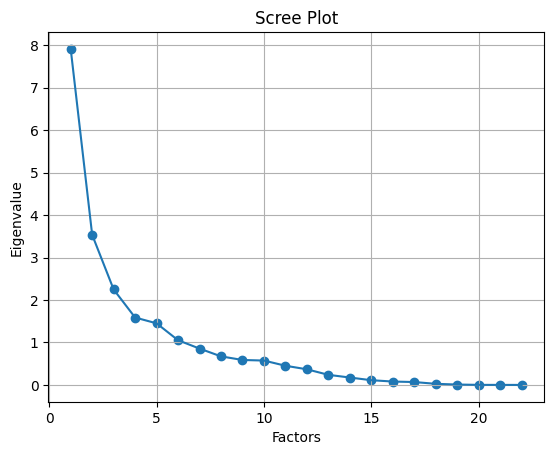

In [ ]:
# 스크리 도표 시각화

plt.scatter(range(1, df_minmax.shape[1]+1), ev)
plt.plot(range(1, df_minmax.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

4개의 요인 지점 이후 경사가 급격히 감소하므로 **4개의 요인을 선정하는 것이 적절**한 것으로 판단됨.

In [ ]:
# 요인 수 선정 및 요인-변수 간 요인 적재값 확인
fa = FactorAnalyzer(n_factors=4, rotation='varimax')
fa.fit(df_minmax)
factor_loadings = pd.DataFrame(fa.loadings_, index=df_minmax.columns)
factor_loadings

,0,1,2,3
G,0.280363,-0.120974,0.823695,0.054468
MP,0.235239,-0.114616,0.820694,0.349032
PER,0.832268,0.305573,0.147761,0.411650
TS%,0.746473,0.103235,0.151836,0.069871
3PAr,-0.015289,-0.593922,0.004644,-0.180311
FTr,0.087057,0.356382,-0.173463,0.112161
ORB%,0.042655,0.785599,-0.047214,-0.058840
DRB%,0.105775,0.711622,0.131665,-0.009666
TRB%,0.076869,0.971609,0.092116,-0.049174
AST%,0.072484,-0.176681,0.082553,0.571263


상관관계는 ±1에 가까울수록 높은 것.
* G 칼럼의 경우 2번 요인과 가장 높은 상관관계를 가지고 있는 것을 확인 가능

<Axes: >

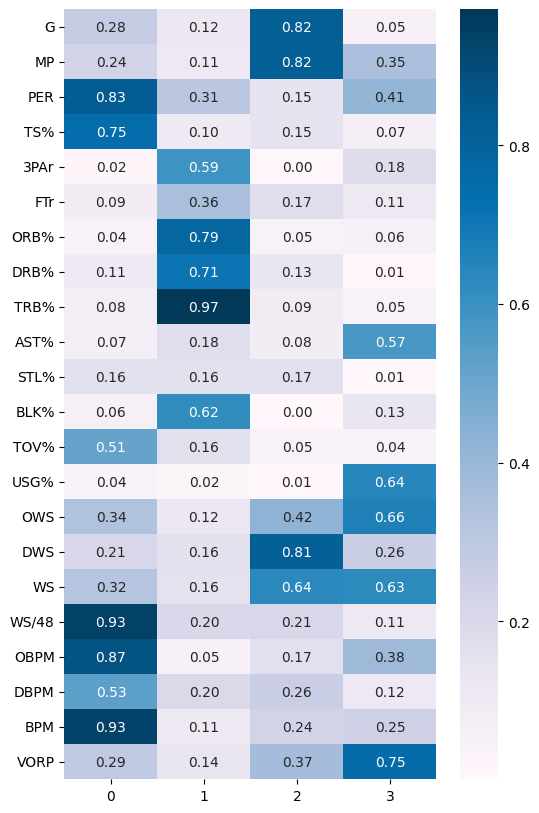

In [ ]:
# 변수 간 요인 적재값 시각화

plt.figure(figsize=(6, 10))
sns.heatmap(abs(factor_loadings), cmap='PuBu', annot=True, fmt='.2f')

## **다중공선성 multicollinearity**
독립변수들 간의 상관관계가 높은 현상을 뜻함.

다중공선성을 판별하는 기준:
1. 상관분석
 * 회귀 분석 모델을 실행하기 전에 상관분석을 통해 독립 변수 간의 상관성을 확인하여 높은 상관계수를 갖는 독립변수를 찾아내는 방법.
 * 상관계수의 절대치가 0.7 이상이면 두 변수간 상관성이 높음.
 * 변수가 많으면 힘듦.
2. 결정계수와 t값
 * 회귀분석 결과에서 독립변수들의 설명력을 의미하는 결정계수의 값은 크지만 회귀계수에 대한 t값이 낮다면 다중공선성.


#### VIF: Variance Inflation Factor 분산팽창계수
해당 변수의 VIF값은 회귀분석 모델에 사용된 다른 독립 변수들이 해당 변수 대신 모델을 설명해 줄 수 있는 정도

> **해당 변수가 다른 변수들에 의해 설명될 수 있는 정도**

VIF가 크다는 것은 해당 변수가 다른 변수들과 상관성이 높다는 것!
* 다중공선성을 해결하기 위한 가장 기본적인 방법은 VIF값이 높은 변수들 중에서 종속변수와의 상관성(설명력)이 가장 낮은 변수를 제거하고 다시 VIF값을 확인하는 것을 반복하는 것.

#### Shapley Value 섀플리 값
각 독립변수가 종속변수의 설명력에 기여하는 순수한 수치를 계산하는 방법.

## Z-test와 T-test
양적 변수를 분석하며, 모집단의 분산을 알 수 있는지의 여부와 표본의 크기에 따라 분석 방법이 달라진다.

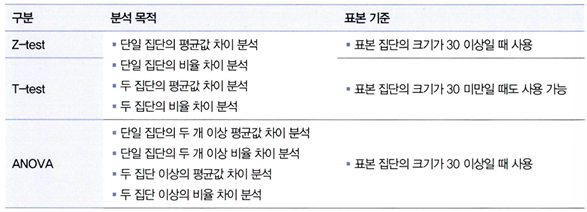


In [ ]:
from scipy.stats import shapiro
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats
from scipy.stats import ttest_ind
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Z-test와 T-test 실습
df = pd.read_csv('Golf_test.csv')
df.head()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


In [ ]:
df.describe()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,268.460000,270.720000,273.600000,276.100000,270.360000,271.040000
std,9.817124,8.487782,8.566665,8.493094,8.385507,9.437139
min,250.000000,255.000000,258.000000,261.000000,255.000000,253.000000
25%,262.000000,264.000000,266.250000,269.000000,263.250000,265.000000
50%,266.000000,271.000000,273.500000,276.500000,268.500000,268.000000
75%,275.750000,275.000000,278.000000,280.000000,275.750000,277.750000
max,289.000000,289.000000,292.000000,295.000000,289.000000,291.000000


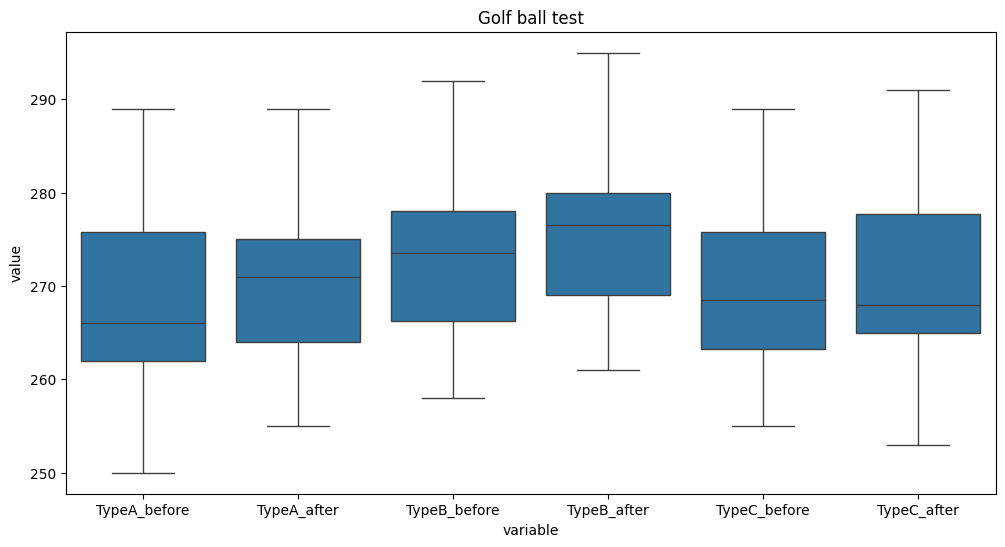

In [ ]:
# 그룹별 box plot 시각화
df2 = pd.melt(df)
plt.figure(figsize=(12, 6))
sns.boxplot(x='variable', y='value', data=df2)
plt.title('Golf ball test')
plt.show()

In [ ]:
print(shapiro(df['TypeA_before']))
print(shapiro(df['TypeA_after']))
print(shapiro(df['TypeB_before']))
print(shapiro(df['TypeB_after']))
print(shapiro(df['TypeC_before']))
print(shapiro(df['TypeC_after']))

ShapiroResult(statistic=0.9655377158052212, pvalue=0.15154941346876938)
ShapiroResult(statistic=0.9728279567361319, pvalue=0.30051020169283893)
ShapiroResult(statistic=0.9730037974106026, pvalue=0.305345354286895)
ShapiroResult(statistic=0.9693011028933032, pvalue=0.2167560294629035)
ShapiroResult(statistic=0.9595516780117022, pvalue=0.08512947305030288)
ShapiroResult(statistic=0.946983211173158, pvalue=0.025681947801527313)


In [ ]:
# 데이터 등분산성 검정
scipy.stats.bartlett(df['TypeA_before'], df['TypeA_after'],
               df['TypeB_before'], df['TypeB_after'],
               df['TypeC_before'], df['TypeC_after'])

BartlettResult(statistic=2.232358764161634, pvalue=0.8161484218330712)

In [ ]:
# Z-test
ztest(df['TypeA_before'], x2=df['TypeA_after'], value=0, alternative='two-sided')

(-1.2313987682249838, 0.21817375744980994)

In [ ]:
ztest(df['TypeB_before'], x2=df['TypeB_after'], value=0, alternative='two-sided')

(-1.4654231861985607, 0.14280549535732345)

In [ ]:
# 단측검정(왼꼬리검정)
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='smaller'))

# 단측검정(오른꼬리검정)
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='larger'))

(-2.789495974658115, 0.002639507633872926)
(-2.789495974658115, 0.9973604923661271)


In [ ]:
# 대응표본 t검정 수행
scipy.stats.ttest_rel(df['TypeA_before'], df['TypeA_after'])

# TypeA 골프공의 특정 처리 전과 후 평균 값 차이에 대한 T-test 결과 p-value: 0.227
# Z-test의 결과처럼 유의미하지 않음

TtestResult(statistic=-1.221439914972903, pvalue=0.227763764486876, df=49)

## **ANOVA: Analysis of Variance 분산분석**

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats
from scipy.stats import ttest_ind
import pandas as pd

In [ ]:
df = pd.read_csv('Golf_test.csv')
df.head()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


In [ ]:
# stats 패키지 분산분석 ANOVA 검정
F_statistic, pVal = stats.f_oneway(df['TypeA_before'],
                                   df['TypeB_before'],
                                   df['TypeC_before'])

print('일원분산분석 결과 : F={0: .1f}, p={1:.5f}'.format(F_statistic, pVal))

일원분산분석 결과 : F= 4.2, p=0.01652


In [ ]:
# 데이터 재구조화
df2 = pd.melt(df)
df2 = df2[df2['variable'].isin(['TypeA_before', 'TypeB_before', 'TypeC_before'])]

df2.head()

,variable,value
0,TypeA_before,277
1,TypeA_before,269
2,TypeA_before,263
3,TypeA_before,266
4,TypeA_before,262


In [ ]:
# ols 패키지 아노바 검정

model = ols('value ~ C(variable)', df2).fit()
print(anova_lm(model))

                df        sum_sq     mean_sq         F    PR(>F)
C(variable)    2.0    675.453333  337.726667  4.220169  0.016515
Residual     147.0  11763.940000   80.026803       NaN       NaN


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
TypeA_before TypeB_before     5.14 0.0129  0.9038 9.3762   True
TypeA_before TypeC_before      1.9 0.5392 -2.3362 6.1362  False
TypeB_before TypeC_before    -3.24 0.1696 -7.4762 0.9962  False
---------------------------------------------------------------


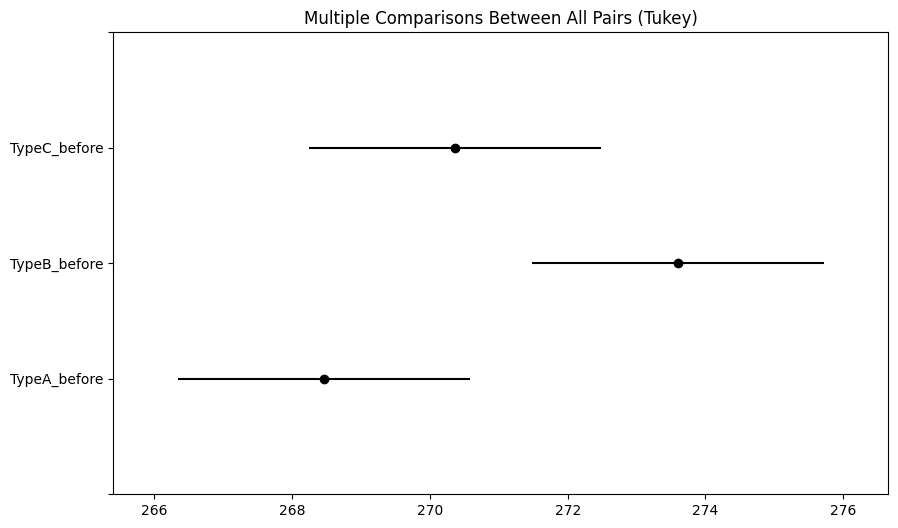

In [ ]:
# 사후검정
posthoc = pairwise_tukeyhsd(df2['value'], df2['variable'], alpha=0.05)
print(posthoc)
fig = posthoc.plot_simultaneous()

### 카이제곱 검정(교차분석)
Chi-sqaure test. Crosstabs.

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv('smoker.csv')
df.head()

,sex,smoke
0,male,Non-Smoker
1,male,Smoker
2,male,Non-Smoker
3,male,Smoker
4,male,Non-Smoker


In [ ]:
# 항목별 집계
df.groupby(['sex', 'smoke'])['smoke'].count()

sex     smoke     
female  Non-Smoker    50
        Smoker        12
male    Non-Smoker    40
        Smoker        29
Name: smoke, dtype: int64

In [ ]:
# 카이제곱 검정용 데이터셋 가공
crosstab = pd.crosstab(df.sex, df.smoke)
crosstab

smoke,Non-Smoker,Smoker
sex,,
female,50,12
male,40,29


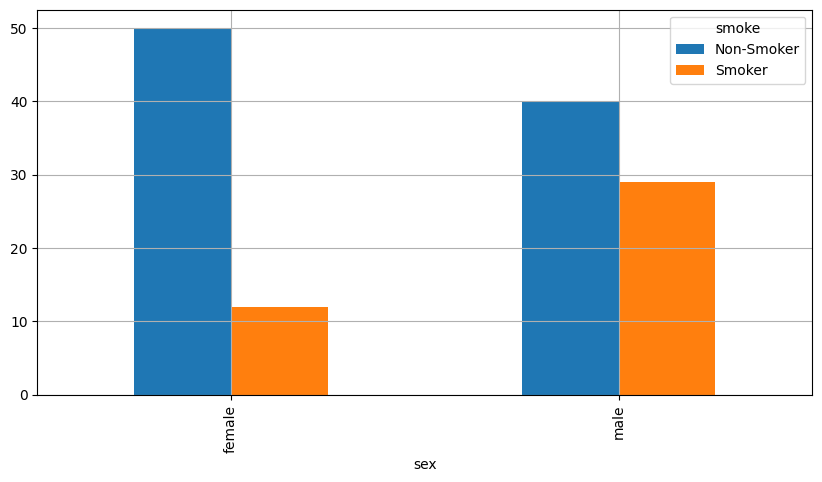

In [ ]:
# 성별 흡연자 수 시각화
%matplotlib inline
crosstab.plot(kind='bar', figsize=(10, 5))
plt.grid()

In [ ]:
# 카이제곱 검정
chiresult = chi2_contingency(crosstab, correction=False)
print('Chi square: {}'.format(chiresult[0]))
print('P-value: {}'.format(chiresult[1]))

Chi square: 7.8081404703715105
P-value: 0.005201139711454792


## 선형 회귀분석과 Elastic Net(예측모델)